In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [2]:
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs, make_circles

In [3]:
def plot_data(pl, X, y):
  
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    pl.legend(['0', '1'])
   

    return pl


In [4]:
X, y = make_circles(
    n_samples = 400, 
    factor = 0.6, 
    noise = 0.1, 
    random_state = 42
)

In [5]:
seed=1

from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

In [6]:
model.add(Dense(256, activation = 'tanh', input_dim = 2))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

history=model.fit(X, y, batch_size = 5, epochs = 100, verbose = 1)

Epoch 1/100
80/80 [==============================] - 0s 689us/step - loss: 0.7036
Epoch 2/100
80/80 [==============================] - 0s 672us/step - loss: 0.7016
Epoch 3/100
80/80 [==============================] - 0s 626us/step - loss: 0.7016
Epoch 4/100
80/80 [==============================] - 0s 712us/step - loss: 0.7000
Epoch 5/100
80/80 [==============================] - 0s 959us/step - loss: 0.6987
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6892
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6853
Epoch 11/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6785
Epoch 12/100
80/80 [==============================] - 0s 674us/step - loss: 0.6711
Epoch 13/100
80/80 [=====

In [7]:
loss = history.history['loss']
loss = np.mean(loss)

In [8]:
def plot_decision_bound(model, X, y):
    amin, bmin = X.min(axis = 0) - 0.1
    amax, bmax = X.max(axis = 0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.contourf(aa, bb, Z, cmap = 'bwr', alpha = 0.2)
    plot_data(plt, X, y)
    
    return plt 

Text(0.5, 1.0, 'Logistic Regression')

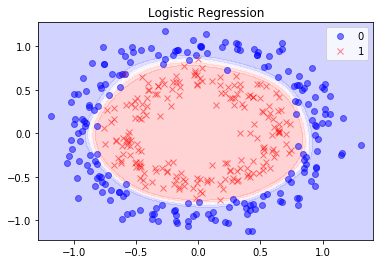

In [9]:
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")

In [10]:
from flask import Flask, jsonify

import requests
import json

In [11]:
from flask_restful import Resource, Api, reqparse

In [ ]:
app = Flask(__name__)
api = Api(app)
# localhost:8080/dataServer로 요청을 하면
# 아래 함수가 동작을 한다는 의미!
@app.route('/dataServer')
def PythonServerResponse():
    print("It's operate")
    summary = {
        'loss':loss
    }
    return jsonify(summary)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
localhost:8080/dataServ